In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv("economy.csv")
from sklearn.model_selection import train_test_split
#split the data into train and test set
train,test = train_test_split(dataset, test_size=0.30, random_state=0)
#save the data
test.to_csv('train.csv',index=False)
train.to_csv('test.csv',index=False)
data_set= pd.read_csv("train.csv")
unseen_set= pd.read_csv("test.csv")
#data_set.head()
unseen_set.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,26-02-2022,Vistara,UK,858,06:40,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:50,Delhi,"7,104"
1,17-02-2022,Vistara,UK,977,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"6,060"
2,18-03-2022,Air India,AI,543,11:20,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Chennai,"4,229"
3,18-02-2022,Vistara,UK,880,13:25,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:20,Bangalore,"11,319"
4,08-03-2022,Indigo,6E,5013,05:00,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:50,Kolkata,"5,843"


In [3]:
data_set.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
dtype: int64

In [4]:
data_set["journey_day"] = pd.to_datetime(data_set.date, format="%d-%m-%Y").dt.day
data_set["journey_month"] = pd.to_datetime(data_set["date"], format = "%d-%m-%Y").dt.month
data_set.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,journey_day,journey_month
0,07-03-2022,AirAsia,I5,1531,22:00,Chennai,01h 30m,non-stop,23:30,Bangalore,"1,548",7,3
1,09-03-2022,Vistara,UK,865,19:10,Mumbai,01h 45m,non-stop,20:55,Bangalore,"2,074",9,3
2,24-02-2022,Indigo,6E,6021,13:55,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Bangalore,"6,977",24,2
3,08-03-2022,Vistara,UK,930,07:30,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Hyderabad,"4,784",8,3
4,12-03-2022,SpiceJet,SG,455,15:30,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:25,Kolkata,"6,196",12,3


In [5]:
unseen_set["journey_day"] = pd.to_datetime(unseen_set.date, format="%d-%m-%Y").dt.day
unseen_set["journey_month"] = pd.to_datetime(unseen_set["date"], format = "%d-%m-%Y").dt.month
unseen_set.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,journey_day,journey_month
0,26-02-2022,Vistara,UK,858,06:40,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:50,Delhi,"7,104",26,2
1,17-02-2022,Vistara,UK,977,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"6,060",17,2
2,18-03-2022,Air India,AI,543,11:20,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Chennai,"4,229",18,3
3,18-02-2022,Vistara,UK,880,13:25,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:20,Bangalore,"11,319",18,2
4,08-03-2022,Indigo,6E,5013,05:00,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:50,Kolkata,"5,843",8,3


In [6]:
data_set.drop(["date"], axis = 1, inplace = True)
data_set.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,journey_day,journey_month
0,AirAsia,I5,1531,22:00,Chennai,01h 30m,non-stop,23:30,Bangalore,"1,548",7,3
1,Vistara,UK,865,19:10,Mumbai,01h 45m,non-stop,20:55,Bangalore,"2,074",9,3
2,Indigo,6E,6021,13:55,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Bangalore,"6,977",24,2
3,Vistara,UK,930,07:30,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Hyderabad,"4,784",8,3
4,SpiceJet,SG,455,15:30,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:25,Kolkata,"6,196",12,3


In [7]:
unseen_set.drop(["date"], axis = 1, inplace = True)
unseen_set.head()

,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,journey_day,journey_month
0,Vistara,UK,858,06:40,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:50,Delhi,"7,104",26,2
1,Vistara,UK,977,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"6,060",17,2
2,Air India,AI,543,11:20,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Chennai,"4,229",18,3
3,Vistara,UK,880,13:25,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:20,Bangalore,"11,319",18,2
4,Indigo,6E,5013,05:00,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:50,Kolkata,"5,843",8,3


In [8]:
# Extracting Hours
data_set["dep_hour"] = pd.to_datetime(data_set["dep_time"]).dt.hour
data_set["dep_min"] = pd.to_datetime(data_set["dep_time"]).dt.minute
data_set.drop(["dep_time"], axis = 1, inplace = True)
data_set.head()

,airline,ch_code,num_code,from,time_taken,stop,arr_time,to,price,journey_day,journey_month,dep_hour,dep_min
0,AirAsia,I5,1531,Chennai,01h 30m,non-stop,23:30,Bangalore,"1,548",7,3,22,0
1,Vistara,UK,865,Mumbai,01h 45m,non-stop,20:55,Bangalore,"2,074",9,3,19,10
2,Indigo,6E,6021,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Bangalore,"6,977",24,2,13,55
3,Vistara,UK,930,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:55,Hyderabad,"4,784",8,3,7,30
4,SpiceJet,SG,455,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,21:25,Kolkata,"6,196",12,3,15,30


In [9]:
unseen_set["dep_hour"] = pd.to_datetime(unseen_set["dep_time"]).dt.hour
unseen_set["dep_min"] = pd.to_datetime(unseen_set["dep_time"]).dt.minute
unseen_set.drop(["dep_time"], axis = 1, inplace = True)
unseen_set.head()

,airline,ch_code,num_code,from,time_taken,stop,arr_time,to,price,journey_day,journey_month,dep_hour,dep_min
0,Vistara,UK,858,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:50,Delhi,"7,104",26,2,6,40
1,Vistara,UK,977,Delhi,02h 15m,non-stop,21:15,Mumbai,"6,060",17,2,19,0
2,Air India,AI,543,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Chennai,"4,229",18,3,11,20
3,Vistara,UK,880,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:20,Bangalore,"11,319",18,2,13,25
4,Indigo,6E,5013,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:50,Kolkata,"5,843",8,3,5,0


In [10]:
data_set["arrival_hour"] = pd.to_datetime(data_set["arr_time"]).dt.hour
data_set["arrival_min"] = pd.to_datetime(data_set["arr_time"]).dt.minute
data_set.drop(["arr_time"], axis = 1, inplace = True)
data_set.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,AirAsia,I5,1531,Chennai,01h 30m,non-stop,Bangalore,"1,548",7,3,22,0,23,30
1,Vistara,UK,865,Mumbai,01h 45m,non-stop,Bangalore,"2,074",9,3,19,10,20,55
2,Indigo,6E,6021,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"6,977",24,2,13,55,20,45
3,Vistara,UK,930,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,"4,784",8,3,7,30,19,55
4,SpiceJet,SG,455,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"6,196",12,3,15,30,21,25


In [11]:
unseen_set["arrival_hour"] = pd.to_datetime(unseen_set["arr_time"]).dt.hour
unseen_set["arrival_min"] = pd.to_datetime(unseen_set["arr_time"]).dt.minute
unseen_set.drop(["arr_time"], axis = 1, inplace = True)
unseen_set.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,Vistara,UK,858,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Delhi,"7,104",26,2,6,40,22,50
1,Vistara,UK,977,Delhi,02h 15m,non-stop,Mumbai,"6,060",17,2,19,0,21,15
2,Air India,AI,543,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Chennai,"4,229",18,3,11,20,19,0
3,Vistara,UK,880,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"11,319",18,2,13,25,23,20
4,Indigo,6E,5013,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"5,843",8,3,5,0,10,50


In [12]:
duration = list(data_set["time_taken"])

In [13]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i] # Adds 0 hour
data_set.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,AirAsia,I5,1531,Chennai,01h 30m,non-stop,Bangalore,"1,548",7,3,22,0,23,30
1,Vistara,UK,865,Mumbai,01h 45m,non-stop,Bangalore,"2,074",9,3,19,10,20,55
2,Indigo,6E,6021,Kolkata,06h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"6,977",24,2,13,55,20,45
3,Vistara,UK,930,Mumbai,12h 25m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,"4,784",8,3,7,30,19,55
4,SpiceJet,SG,455,Mumbai,05h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"6,196",12,3,15,30,21,25


In [14]:
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    if((duration[i]=='1.03h m') or (duration[i]=='1.02h m')or (duration[i]=='1.01h m')):
        if((duration[i]=='1.03h m')): 
            duration_hours.append(1)
            duration_mins.append(3)
        elif (duration[i]=='1.02h m'):
            duration_hours.append(1)
            duration_mins.append(2)
        elif (duration[i]=='1.01h m'):
            duration_hours.append(1)
            duration_mins.append(3)
    else:
        duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
        duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

# Extracts only minutes from duration
# Add duration_hours and duration_mins list to our dataset df
data_set["Duration_hours"] = duration_hours
data_set["Duration_mins"] = duration_mins
# Drop Duration column from the dataset
data_set.drop(["time_taken"], axis = 1, inplace = True)

data_set.head()


,airline,ch_code,num_code,from,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,AirAsia,I5,1531,Chennai,non-stop,Bangalore,"1,548",7,3,22,0,23,30,1,30
1,Vistara,UK,865,Mumbai,non-stop,Bangalore,"2,074",9,3,19,10,20,55,1,45
2,Indigo,6E,6021,Kolkata,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"6,977",24,2,13,55,20,45,6,50
3,Vistara,UK,930,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,"4,784",8,3,7,30,19,55,12,25
4,SpiceJet,SG,455,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"6,196",12,3,15,30,21,25,5,55


In [15]:
duration1 = list(unseen_set["time_taken"])

In [16]:
for i in range(len(duration1)):
    if len(duration1[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration1[i]:
            duration1[i] = duration1[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration1[i] = "0h " + duration1[i] # Adds 0 hour
unseen_set.head()

,airline,ch_code,num_code,from,time_taken,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min
0,Vistara,UK,858,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Delhi,"7,104",26,2,6,40,22,50
1,Vistara,UK,977,Delhi,02h 15m,non-stop,Mumbai,"6,060",17,2,19,0,21,15
2,Air India,AI,543,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Chennai,"4,229",18,3,11,20,19,0
3,Vistara,UK,880,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"11,319",18,2,13,25,23,20
4,Indigo,6E,5013,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"5,843",8,3,5,0,10,50


In [17]:
duration_hours1 = []
duration_mins1 = []

for i in range(len(duration1)):
    if((duration1[i]=='1.03h m') or (duration1[i]=='1.02h m')or (duration1[i]=='1.01h m')):
        if((duration1[i]=='1.03h m')): 
            duration_hours1.append(1)
            duration_mins1.append(3)
        elif (duration1[i]=='1.02h m'):
            duration_hours1.append(1)
            duration_mins1.append(2)
        elif (duration1[i]=='1.01h m'):
            duration_hours1.append(1)
            duration_mins1.append(3)
    else:
        duration_hours1.append(int(duration1[i].split(sep = "h")[0]))    # Extract hours from duration
        duration_mins1.append(int(duration1[i].split(sep = "m")[0].split()[-1]))

# Extracts only minutes from duration
# Add duration_hours and duration_mins list to our dataset df
unseen_set["Duration_hours"] = duration_hours1
unseen_set["Duration_mins"] = duration_mins1
# Drop Duration column from the dataset
unseen_set.drop(["time_taken"], axis = 1, inplace = True)

unseen_set.head()


,airline,ch_code,num_code,from,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,Vistara,UK,858,Bangalore,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Delhi,"7,104",26,2,6,40,22,50,16,10
1,Vistara,UK,977,Delhi,non-stop,Mumbai,"6,060",17,2,19,0,21,15,2,15
2,Air India,AI,543,Hyderabad,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Chennai,"4,229",18,3,11,20,19,0,7,40
3,Vistara,UK,880,Hyderabad,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"11,319",18,2,13,25,23,20,9,55
4,Indigo,6E,5013,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"5,843",8,3,5,0,10,50,5,50


In [18]:
data_set["airline"].value_counts()

Vistara      20161
Air India    14423
Indigo       12918
GO FIRST      6978
AirAsia       4806
SpiceJet      2717
StarAir         16
Trujet          14
Name: airline, dtype: int64

In [19]:
unseen_set["airline"].value_counts()

Vistara      47109
Air India    33573
Indigo       30202
GO FIRST     16199
AirAsia      11292
SpiceJet      6294
StarAir         45
Trujet          27
Name: airline, dtype: int64

In [20]:
Airline = data_set[["airline"]]
Current_Airline_List = Airline['airline']
New_Airline_List = []
for carrier in Current_Airline_List:
    if carrier in ['GO FIRST', 'Indigo', 'Air India', 'SpiceJet',
       'Trujet', 'StarAir', 'Vistara', 'AirAsia']:
        New_Airline_List.append(carrier)
    else:
        New_Airline_List.append('Other')
Airline['airline'] = pd.DataFrame(New_Airline_List)
Airline['airline'].value_counts()

/var/folders/5p/m3thzv397hbdrw3c1l0xjynr0000gn/T/ipykernel_4767/2361171409.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['airline'] = pd.DataFrame(New_Airline_List)


Vistara      20161
Air India    14423
Indigo       12918
GO FIRST      6978
AirAsia       4806
SpiceJet      2717
StarAir         16
Trujet          14
Name: airline, dtype: int64

In [21]:
Airline = unseen_set[["airline"]]
Current_Airline_List = Airline['airline']
New_Airline_List = []
for carrier in Current_Airline_List:
    if carrier in ['GO FIRST', 'Indigo', 'Air India', 'SpiceJet',
       'Trujet', 'StarAir', 'Vistara', 'AirAsia']:
        New_Airline_List.append(carrier)
    else:
        New_Airline_List.append('Other')
Airline['airline'] = pd.DataFrame(New_Airline_List)
Airline['airline'].value_counts()

/var/folders/5p/m3thzv397hbdrw3c1l0xjynr0000gn/T/ipykernel_4767/2659727423.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airline['airline'] = pd.DataFrame(New_Airline_List)


Vistara      47109
Air India    33573
Indigo       30202
GO FIRST     16199
AirAsia      11292
SpiceJet      6294
StarAir         45
Trujet          27
Name: airline, dtype: int64

In [22]:
# Feature engineering on: Source
print(data_set["from"].value_counts())
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = data_set[["from"]]
Source = pd.get_dummies(Source, drop_first= True) 
# drop_first= True means we drop the first column to prevent multicollinearity
Source.head()

Delhi        12825
Mumbai       12239
Bangalore    10641
Kolkata       9970
Hyderabad     8479
Chennai       7879
Name: from, dtype: int64


,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,1,0,0,0,0
1,0,0,0,0,1
2,0,0,0,1,0
3,0,0,0,0,1
4,0,0,0,0,1


In [23]:
# Feature engineering on: Source
print(unseen_set["from"].value_counts())
# As Source is Nominal Categorical data we will perform OneHotEncoding
Source = unseen_set[["from"]]
Source = pd.get_dummies(Source, drop_first= True) 
# drop_first= True means we drop the first column to prevent multicollinearity
Source.head()

Delhi        30204
Mumbai       28806
Bangalore    25024
Kolkata      22904
Hyderabad    19511
Chennai      18292
Name: from, dtype: int64


,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,0,1


In [24]:
# Feature engineering on: Destination
print(data_set["to"].value_counts())
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = data_set[["to"]]
Current_Destination_List = Destination['to']
New_Destination_List = []
for value in Current_Destination_List:
    if value in ['New Delhi']:
        New_Destination_List.append('Delhi')
    else:
        New_Destination_List.append(value)
Destination['to'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

Delhi        12257
Mumbai       11957
Bangalore    10518
Kolkata      10226
Hyderabad     8958
Chennai       8117
Name: to, dtype: int64


/var/folders/5p/m3thzv397hbdrw3c1l0xjynr0000gn/T/ipykernel_4767/78950206.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['to'] = pd.DataFrame(New_Destination_List)


,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [25]:
# Feature engineering on: Destination
print(unseen_set["to"].value_counts())
# Renaming destination 'New Delhi' to 'Delhi' - to match with Source
Destination = unseen_set[["to"]]
Current_Destination_List = Destination['to']
New_Destination_List = []
for value in Current_Destination_List:
    if value in ['New Delhi']:
        New_Destination_List.append('Delhi')
    else:
        New_Destination_List.append(value)
Destination['to'] = pd.DataFrame(New_Destination_List)

# As Destination is Nominal Categorical data we will perform OneHotEncoding
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

Delhi        28397
Mumbai       28161
Kolkata      24551
Bangalore    24396
Hyderabad    20143
Chennai      19093
Name: to, dtype: int64


/var/folders/5p/m3thzv397hbdrw3c1l0xjynr0000gn/T/ipykernel_4767/3073474112.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Destination['to'] = pd.DataFrame(New_Destination_List)


,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,0,1,0,0,0
1,0,0,0,0,1
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,1,0


In [26]:
data_set["stop"].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      48608
non-stop                                                                         8420
2+-stop                                                                          3660
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 307
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 177
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t               122
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t              106
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                 101
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  96
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          69
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t                  58
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JRG\n\t\t\t\t\t\t\

In [27]:
unseen_set["stop"].value_counts()

1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      113506
non-stop                                                                         19522
2+-stop                                                                           8545
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                  756
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                  411
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                310
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               275
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  220
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  188
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          157
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t                  135
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JRG\n\t

In [28]:
unseen_set.shape

(144741, 15)

In [29]:
data_set.head()

,airline,ch_code,num_code,from,stop,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins
0,AirAsia,I5,1531,Chennai,non-stop,Bangalore,"1,548",7,3,22,0,23,30,1,30
1,Vistara,UK,865,Mumbai,non-stop,Bangalore,"2,074",9,3,19,10,20,55,1,45
2,Indigo,6E,6021,Kolkata,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Bangalore,"6,977",24,2,13,55,20,45,6,50
3,Vistara,UK,930,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Hyderabad,"4,784",8,3,7,30,19,55,12,25
4,SpiceJet,SG,455,Mumbai,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,Kolkata,"6,196",12,3,15,30,21,25,5,55


In [30]:
old = list(data_set["stop"])
Stops = []

for i in range(len(old)):
        if((old[i]=='non-stop ')): 
            Stops.append(0)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JRG\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Ranchi\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mysore\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mangalore\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolkata\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NAG\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Vishakhapatnam\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolhapur\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXR\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        elif (old[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops.append(1)
        else:
            Stops.append(2)
            
# Extracts only minutes from duration
# Add duration_hours and duration_mins list to our dataset df
data_set["Stop"] = Stops
# Drop Duration column from the dataset
data_set.drop(["stop"], axis = 1, inplace = True)

data_set.head()

,airline,ch_code,num_code,from,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Stop
0,AirAsia,I5,1531,Chennai,Bangalore,"1,548",7,3,22,0,23,30,1,30,0
1,Vistara,UK,865,Mumbai,Bangalore,"2,074",9,3,19,10,20,55,1,45,0
2,Indigo,6E,6021,Kolkata,Bangalore,"6,977",24,2,13,55,20,45,6,50,1
3,Vistara,UK,930,Mumbai,Hyderabad,"4,784",8,3,7,30,19,55,12,25,1
4,SpiceJet,SG,455,Mumbai,Kolkata,"6,196",12,3,15,30,21,25,5,55,1


In [31]:
old1 = list(unseen_set["stop"])
Stops1 = []

for i in range(len(old1)):
        if((old1[i]=='non-stop ')): 
            Stops1.append(0)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JGB\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia JRG\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Ranchi\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Delhi\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mysore\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mangalore\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Mumbai\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolkata\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NAG\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Vishakhapatnam\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia BBI\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Kolhapur\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXR\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        elif (old1[i]=='1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'):
            Stops1.append(1)
        else:
            Stops1.append(2)
            
# Extracts only minutes from duration
# Add duration_hours and duration_mins list to our dataset df
unseen_set["Stop"] = Stops1
# Drop Duration column from the dataset
unseen_set.drop(["stop"], axis = 1, inplace = True)

unseen_set.head()

,airline,ch_code,num_code,from,to,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,Duration_mins,Stop
0,Vistara,UK,858,Bangalore,Delhi,"7,104",26,2,6,40,22,50,16,10,1
1,Vistara,UK,977,Delhi,Mumbai,"6,060",17,2,19,0,21,15,2,15,0
2,Air India,AI,543,Hyderabad,Chennai,"4,229",18,3,11,20,19,0,7,40,1
3,Vistara,UK,880,Hyderabad,Bangalore,"11,319",18,2,13,25,23,20,9,55,1
4,Indigo,6E,5013,Mumbai,Kolkata,"5,843",8,3,5,0,10,50,5,50,1


In [32]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_train = pd.concat([data_set, Airline, Source, Destination], axis = 1) # axis = 1 signifies column
data_train.drop(["airline", "to", "from"], axis = 1, inplace = True)

data_train.head()

,ch_code,num_code,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,...,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,I5,1531.0,"1,548",7.0,3.0,22.0,0.0,23.0,30.0,1.0,...,0,0,0,0,0,0,1,0,0,0
1,UK,865.0,"2,074",9.0,3.0,19.0,10.0,20.0,55.0,1.0,...,0,1,0,0,0,0,0,0,0,1
2,6E,6021.0,"6,977",24.0,2.0,13.0,55.0,20.0,45.0,6.0,...,0,0,1,0,0,1,0,0,0,0
3,UK,930.0,"4,784",8.0,3.0,7.0,30.0,19.0,55.0,12.0,...,0,0,1,0,0,0,0,0,0,0
4,SG,455.0,"6,196",12.0,3.0,15.0,30.0,21.0,25.0,5.0,...,0,0,0,0,1,0,0,0,1,0


In [33]:
# Concatenate dataframe --> train_data + Airline + Source + Destination
data_test = pd.concat([unseen_set, Airline, Source, Destination], axis = 1) # axis = 1 signifies column
data_test.drop(["airline", "to", "from"], axis = 1, inplace = True)

data_test.head()

,ch_code,num_code,price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_min,Duration_hours,...,from_Chennai,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,UK,858,"7,104",26,2,6,40,22,50,16,...,0,0,0,0,0,0,1,0,0,0
1,UK,977,"6,060",17,2,19,0,21,15,2,...,0,1,0,0,0,0,0,0,0,1
2,AI,543,"4,229",18,3,11,20,19,0,7,...,0,0,1,0,0,1,0,0,0,0
3,UK,880,"11,319",18,2,13,25,23,20,9,...,0,0,1,0,0,0,0,0,0,0
4,6E,5013,"5,843",8,3,5,0,10,50,5,...,0,0,0,0,1,0,0,0,1,0


In [34]:
data_train.shape

(144741, 22)

In [35]:
data_test.shape

(144741, 22)

In [36]:
data_train.columns

Index(['ch_code', 'num_code', 'price', 'journey_day', 'journey_month',
       'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Stop', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai'],
      dtype='object')

In [37]:
data_train = data_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)
X = data_train.loc[:, ['journey_day', 'journey_month',
       'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Stop', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai']]
Y = data_train.iloc[:, 1]

In [38]:
print(X.shape, Y.shape)

(144741, 19) (144741,)


In [39]:
from sklearn.ensemble import ExtraTreesRegressor
#X = np.nan_to_num(X)
#Y = np.nan_to_num(Y)
selection = ExtraTreesRegressor()
selection.fit(X, Y)

print(selection.feature_importances_)

[0.04003062 0.17962812 0.15164697 0.12406942 0.11909116 0.09833137
 0.10322004 0.11038182 0.01541068 0.00541167 0.00616503 0.00578053
 0.00586434 0.00611838 0.00514453 0.00632932 0.00564388 0.00533703
 0.00639511]


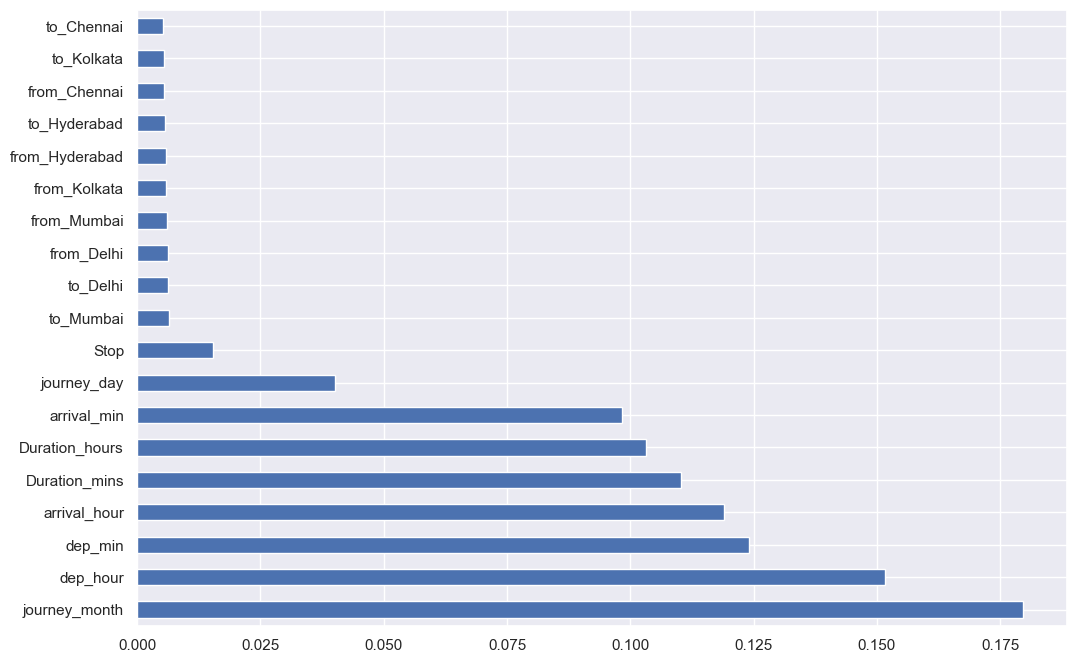

In [40]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [41]:
# Checking for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    # Calculating Variable Inflation Factor (VIF)
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [42]:
calc_vif(X)

,variables,VIF
0,journey_day,4.796443
1,journey_month,14.852508
2,dep_hour,6.418269
3,dep_min,3.228467
4,arrival_hour,6.243766
5,arrival_min,3.458246
6,Duration_hours,4.411878
7,Duration_mins,3.295536
8,Stop,7.049574
9,from_Chennai,1.336120


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [44]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, Y_train)

RandomForestRegressor()

In [45]:
print('Model Performance on Training Set:', round(rf_reg.score(X_train, Y_train)*100,2))
print('Model Performance on Test Set:', round(rf_reg.score(X_test, Y_test)*100,2))

Model Performance on Training Set: 97.84
Model Performance on Test Set: 84.2


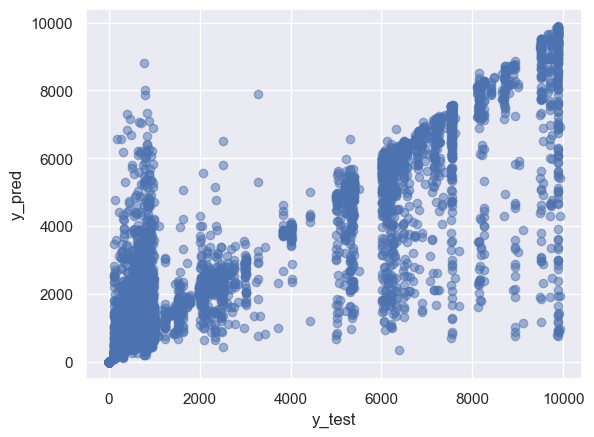

In [46]:
# Plot performance graph
y_pred = rf_reg.predict(X_test)
plt.scatter(Y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [47]:
# Model Error Values
import sklearn.metrics as metrics
print('MAE:', metrics.mean_absolute_error(Y_test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))
#RMSE = sqrt((PV-OV)^2/n)

MAE: 188.83588909395672
MSE: 490293.2414044121
RMSE: 700.2094268177286


In [48]:
print('Normalized RMSE ', round(np.sqrt(metrics.mean_squared_error(Y_test, y_pred))/(max(Y_test)-min(Y_test)),2))
print('Max Value: ', max(Y), '\nMin Value: ', min(Y))

Normalized RMSE  0.07
Max Value:  9974.0 
Min Value:  0.0


In [64]:
import pickle

# open a file to store the data
file = open('/Users/mythrikulkarni/Desktop/GDSC/datastorage.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)

In [73]:
#file.seek(0)
path = '/Users/mythrikulkarni/Desktop/GDSC/datastorage.pkl'
model = open(path,'rb')
rf_model = pickle.load(model)

In [74]:
X_unseen = data_test.loc[:, ['journey_day', 'journey_month',
       'dep_hour', 'dep_min', 'arrival_hour', 'arrival_min', 'Duration_hours',
       'Duration_mins', 'Stop', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'from_Mumbai', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai']]
Y_unseen = data_test.iloc[:, 1]

In [75]:
y_pred = rf_model.predict(X_unseen)

In [76]:
print('R2 value: ', round(metrics.r2_score(Y_unseen, y_pred),2))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(Y_unseen, y_pred))/(max(Y_unseen)-min(Y_unseen)),2))
print('Max Value: ', max(Y_unseen), '\nMin Value: ', min(Y_unseen))

R2 value:  0.79
Normalized RMSE:  0.11
Max Value:  9991 
Min Value:  101


In [77]:
# writing model output file
df_y_pred = pd.DataFrame(y_pred,columns= ['Predicted Price'])
original_dataset = pd.read_csv("test.csv")
dfx = pd.concat([original_dataset, df_y_pred], axis=1)
dfx.to_csv("final.csv")
dfx.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,Predicted Price
0,26-02-2022,Vistara,UK,858,06:40,Bangalore,16h 10m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:50,Delhi,"7,104",871.48
1,17-02-2022,Vistara,UK,977,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"6,060",889.99
2,18-03-2022,Air India,AI,543,11:20,Hyderabad,07h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,19:00,Chennai,"4,229",556.01
3,18-02-2022,Vistara,UK,880,13:25,Hyderabad,09h 55m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:20,Bangalore,"11,319",869.00
4,08-03-2022,Indigo,6E,5013,05:00,Mumbai,05h 50m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,10:50,Kolkata,"5,843",4658.79
